In [ ]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset de avaliações de produtos
df_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DaVinci_Sprint3/archive/olist_order_reviews_dataset.csv')

# Exibe as primeiras linhas
print(df_reviews.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

#### **Análise de Avaliações Ausentes**

Neste momento, vamos verificar por valores ausentes, que seriam clientes que não realizaram avaliação do produto.

In [ ]:
# Verificar se há valores ausentes
missing_values = df_reviews.isnull().sum()
print(missing_values)

# Filtrar linhas onde o comentário está ausente
missing_reviews = df_reviews[df_reviews['review_comment_message'].isnull()]
print(f"Número de avaliações sem comentários: {len(missing_reviews)}")

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Número de avaliações sem comentários: 58247


#### **Distribuição das Avaliações**

Agora, vamos analisar a distribuição das notas das avaliações (coluna review_score), para ver como estão distribuídas entre positivas, neutras e negativas.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-6-dad6bce83890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='review_score', palette='viridis')


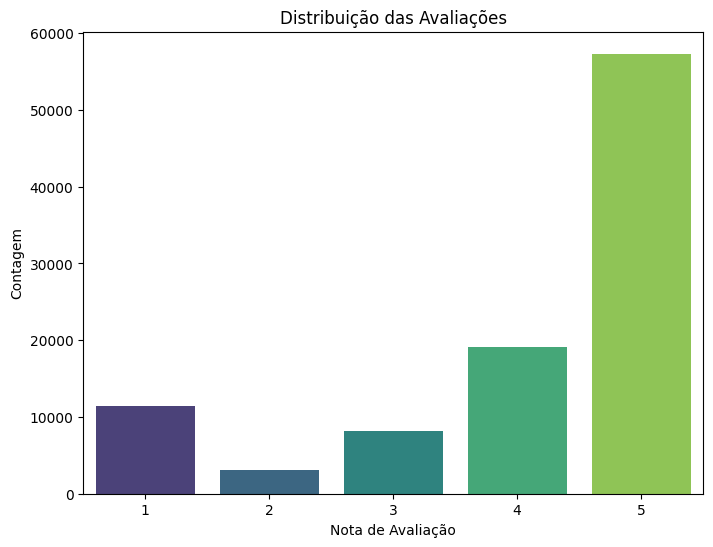

In [ ]:
# Distribuição das notas de avaliação
plt.figure(figsize=(8, 6))
sns.countplot(data=df_reviews, x='review_score', palette='viridis')
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Contagem de cada nota de avaliação
review_score_counts = df_reviews['review_score'].value_counts().sort_index()

# Distribuição das notas
for score, count in review_score_counts.items():
    print(f"Nota {score}: {count} avaliações")


Nota 1: 11424 avaliações
Nota 2: 3151 avaliações
Nota 3: 8179 avaliações
Nota 4: 19142 avaliações
Nota 5: 57328 avaliações


#### **Análise Textual Inicial**

Exibição de alguns comentários para observar sua estrutura.

In [ ]:
# Exibir alguns comentários
sample_reviews = df_reviews[['review_comment_message', 'review_score']].dropna().sample(10)
print(sample_reviews)

                                  review_comment_message  review_score
16512                            loja mto boa de comprar             4
4618              Entrega rápida , produto de qualidade!             5
62220                                          Muito bom             5
31980                           empresa confiável e ágil             5
4285                                                 bom             4
81694  produto entregue antes da data previsa, maravi...             4
52930  Entregue bem antes da previsão.\r\nChegou tudo...             5
38024  O produto é ótimo, já faz algum tempo que uso....             5
87052                                CHEGOU MEGA RAPIDO              5
2042                                  MATERIAL MUITO BOM             5


sentiment
Positiva    76470
Negativa    14575
Neutra       8179
Name: count, dtype: int64


<ipython-input-9-3f6c15b9778c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='sentiment', palette='coolwarm')


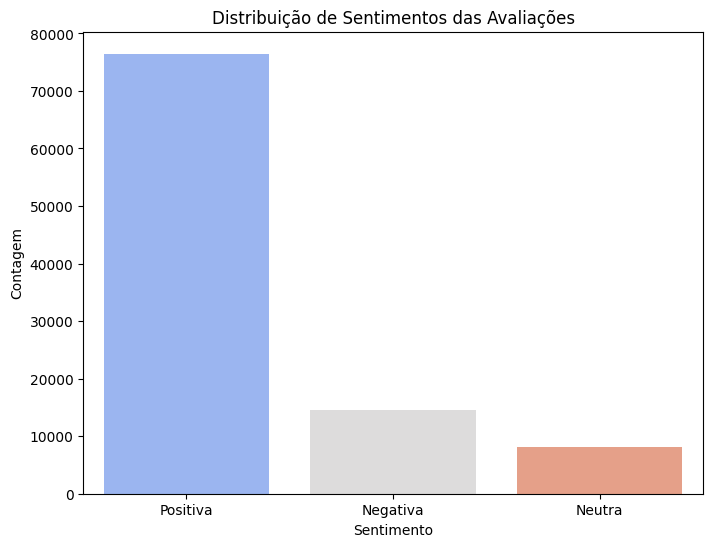

In [ ]:
# Classifica avaliações como Positivas (4 e 5), Neutras (3), e Negativas (1 e 2)
df_reviews['sentiment'] = df_reviews['review_score'].apply(lambda x: 'Positiva' if x > 3 else ('Negativa' if x < 3 else 'Neutra'))

# Conta avaliações por tipo de sentimento
sentiment_counts = df_reviews['sentiment'].value_counts()
print(sentiment_counts)

# Plota a distribuição de sentimentos
plt.figure(figsize=(8, 6))
sns.countplot(data=df_reviews, x='sentiment', palette='coolwarm')
plt.title('Distribuição de Sentimentos das Avaliações')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Contagem de cada tipo de sentimento
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} avaliações")

Positiva: 76470 avaliações
Negativa: 14575 avaliações
Neutra: 8179 avaliações


#### **Avaliações por Produto**

In [ ]:
# Contagem de avaliações por produto
product_review_counts = df_reviews['order_id'].value_counts()
print(f"Média de avaliações por produto: {product_review_counts.mean()}")
print(f"Produto com mais avaliações tem: {product_review_counts.max()} avaliações")

Média de avaliações por produto: 1.0055841010205426
Produto com mais avaliações tem: 3 avaliações


In [ ]:
# Eliminar as colunas especificadas
df_reviews = df_reviews.drop(columns=['review_id', 'order_id', 'review_comment_title', 'review_answer_timestamp', 'review_creation_date'])

In [ ]:
# Eliminar linhas com mensagens vazias ou nulas
df_reviews = df_reviews.dropna(subset=['review_comment_message'])

In [ ]:
# Verificar as primeiras linhas do dataset atualizado
print(df_reviews.head())

    review_score                             review_comment_message sentiment
3              5              Recebi bem antes do prazo estipulado.  Positiva
4              5  Parabéns lojas lannister adorei comprar pela I...  Positiva
9              4  aparelho eficiente. no site a marca do aparelh...  Positiva
12             4    Mas um pouco ,travando...pelo valor ta Boa.\r\n  Positiva
15             5  Vendedor confiável, produto ok e entrega antes...  Positiva


### **Considerações sobre este dataset**

#### 1. **Distribuição das Avaliações**
- A maioria das avaliações é **extremamente positiva**, com **57.328** notas 5 (aproximadamente 58% do total).
- As avaliações **negativas** (notas 1 e 2) somam **14.575**, o que é cerca de 15% das avaliações.
- Notas **neutras** (nota 3) constituem uma parte significativa, com **8.179** avaliações (~8%).
- É importante observar que as notas 4 e 5 combinadas representam mais de **75%** das avaliações, o que sugere uma predominância de feedbacks favoráveis.

#### 2. **Exemplos de Comentários**
- Os comentários **positivos** frequentemente mencionam satisfação com o produto (ex.: "Meu marido adorou a carteira", "ótimo produto e entrega rápida").
- As **negativas** são bem diretas sobre os problemas, como "não está funcionando o produto" ou "produto de má qualidade".
- Comentários **neutros** são mistos, como "apesar do atraso, recomendo" ou "a foto de ilustração não condiz".
  
<b>Esses exemplos sugerem que a qualidade do produto e a pontualidade na entrega são tópicos centrais, e problemas com funcionamento ou qualidade têm mais destaque nas críticas.</b>

#### 3. **Distribuição de Sentimentos**
- Avaliações **positivas** (notas 4 e 5) dominam, com **76.470** avaliações (aproximadamente 75% do total), indicando que a maioria dos consumidores está satisfeita.
- As **neutras** (nota 3) estão com **8.179** avaliações (8%), enquanto as **negativas** somam **14.575**, representando cerca de 15% do total.
  
Essa distribuição indica que o sentimento geral em relação aos produtos é majoritariamente favorável, com uma pequena porcentagem de insatisfação. <b>Porém, como o nível de avaliações positivas é bem maior, o balenceamento das classes precisa ser considerado para treinar o modelo com mais precisão</b>

#### 4. **Média de Avaliações por Produto**
- Cada produto recebeu em média **1 avaliação**, e o produto com mais avaliações tem apenas **3 avaliações**. Isso mostra uma dispersão de avaliações, com poucos produtos acumulando feedback mais significativo.

#### 5. **Treinamento do Modelo**

- O modelo foi treinado no arquivo TreinamentoModelo.ipynb e exportado para dentro desta <a href="https://drive.google.com/drive/folders/1w7pozCVdJworLfcloYjfBSoIqhi4SL99?usp=sharing">pasta do google drive</a>.

### **Sugestão da <i>Da Vinci Insight's</i>: possível solução para a Olist**

Foi observado que há poucas avaliações por produtos, o que significa que há uma quantidade grande de feedbacks ausentes.

Uma solução viável para estimular os clientes à avaliarem suas compras através do sistema em desenvolvimento pela nossa equipe Da Vinci Insights, seria utilizar nosso sistema de estimulo à avaliações, com a possibilidade de contactar o cliente e oferecer benefícios (como moedas, cashback ou cupons) para estimular a avaliação do produto comprado.

Mais detalhes sobre o sistema podem ser encontrados no arquivo DocumentacaoGeral.pdf dentro desta <a href="https://drive.google.com/drive/folders/1w7pozCVdJworLfcloYjfBSoIqhi4SL99?usp=sharing">pasta do google drive</a>.